In [1]:
%matplotlib inline
# %config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 颜色
color = sns.color_palette()
# 数据print精度
pd.set_option('precision',3)

In [3]:
# 读取数据
df = pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 单变量分析

In [5]:
# 简单的数据统计
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [7]:
# set plot style
plt.style.use('ggplot')


Figure 1: Univariate Boxplots


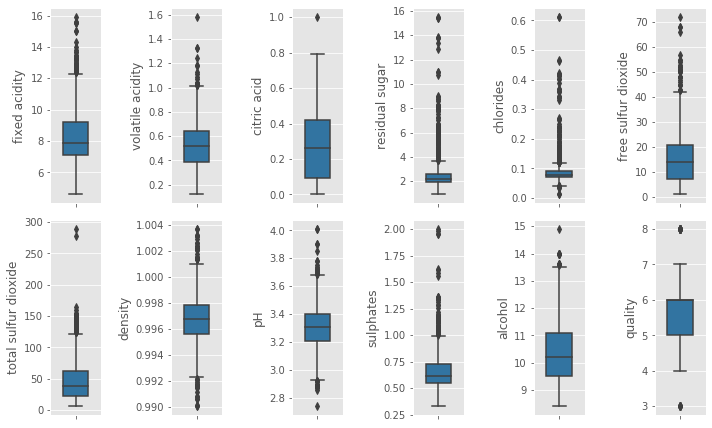

In [11]:
colnm = df.columns.tolist()
fig = plt.figure(figsize=(10,6))

for i in range(12):
    plt.subplot(2,6,i+1)
    sns.boxplot(df[colnm[i]], orient="v", width=0.5, color=color[0])
    plt.ylabel(colnm[i],fontsize=12)
    
plt.tight_layout()
print('\nFigure 1: Univariate Boxplots')


Figure 2: Univariate Histograms


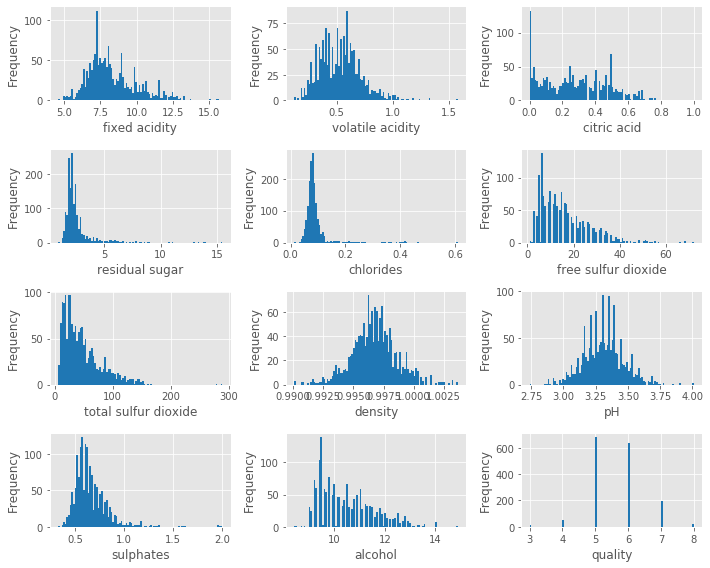

In [12]:
colnm = df.columns.tolist()
plt.figure(figsize=(10,8))

for i in range(12):
    plt.subplot(4,3,i+1)
    df[colnm[i]].hist(bins=100,color=color[0])
    plt.xlabel(colnm[i],fontsize=12)
    plt.ylabel('Frequency')
plt.tight_layout()
print('\nFigure 2: Univariate Histograms')

这个数据集有7个酸度相关的特征：fixed acidity, volatile acidity, citric acid, free sulfur dioxide, total sulfur dioxide, sulphates, pH。前6个特征都与红酒的pH的相关。pH是在对数的尺度，下面对前6个特征取对数然后作histogram。另外，pH值主要是与fixed acidity有关，fixed acidity比volatile acidity和citric acid高1到2个数量级(Figure 4)，比free sulfur dioxide, total sulfur dioxide, sulphates高3个数量级。一个新特征total acid来自于前三个特征的和。


Figure 3: Acidity Features in log10 Scale


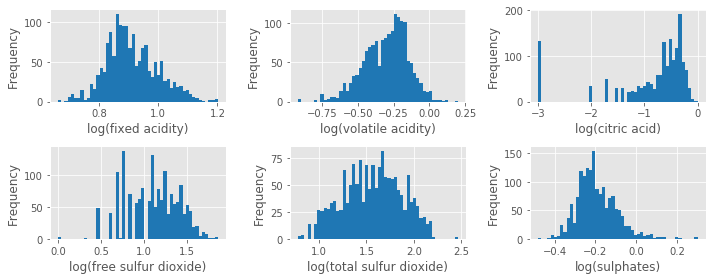

In [14]:
# 酸度相关的特征
acidityFeat = ['fixed acidity', 'volatile acidity', 'citric acid',
               'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']
plt.figure(figsize=(10,4))

for i in range(6):
    ax = plt.subplot(2,3,i+1)
    v = np.log10(np.clip(df[acidityFeat[i]].values,a_min=0.001,a_max=None))
    plt.hist(v, bins=50, color=color[0])
    plt.xlabel('log(' + acidityFeat[i] + ')',fontsize=12)
    plt.ylabel('Frequency')
    
plt.tight_layout()
print('\nFigure 3: Acidity Features in log10 Scale')

Figure 4


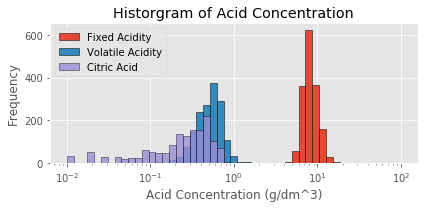

In [16]:
plt.figure(figsize=(6,3))

bins = 10**(np.linspace(-2,2))
plt.hist(df['fixed acidity'], bins=bins, edgecolor='k', label='Fixed Acidity')
plt.hist(df['volatile acidity'],bins=bins,edgecolor='k',label='Volatile Acidity')
plt.hist(df['citric acid'], bins=bins, edgecolor='k', alpha=0.8, label='Citric Acid')
plt.xscale('log')
plt.xlabel('Acid Concentration (g/dm^3)')
plt.ylabel('Frequency')
plt.title('Historgram of Acid Concentration')
plt.legend()
plt.tight_layout()

print('Figure 4')

In [17]:
# 总酸度
df['total acid'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']

Frigure 5: Total Acid Histogram


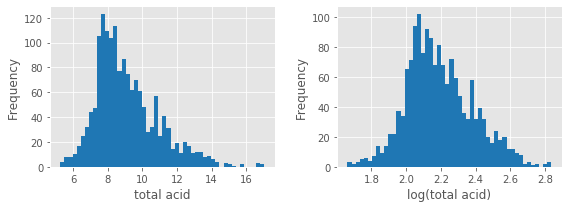

In [18]:
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.hist(df['total acid'], bins=50, color=color[0])
plt.xlabel('total acid')
plt.ylabel('Frequency')
plt.subplot(122)
plt.hist(np.log(df['total acid']), bins=50, color=color[0])
plt.xlabel('log(total acid)')
plt.ylabel('Frequency')
plt.tight_layout()

print("Frigure 5: Total Acid Histogram")

### 甜度 

Residual sugar与酒的甜度相关,通常用来区别各种红酒,干红(<=4g/L),半干(4-12),半甜(12-45g/L和甜（>45 g/L)。 这个数据中，主要为干红，没有甜葡萄酒。

In [19]:
# Residual sugar
df['sweetness'] = pd.cut(df['residual sugar'],bins= [0,4,12,45],
                         labels=["dry", "medium dry", "semi-sweet"])

Figure 6: Sweetness


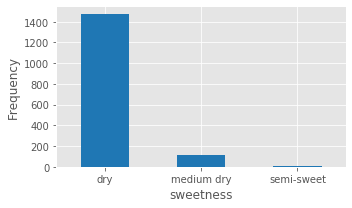

In [20]:
plt.figure(figsize=(5,3))
df['sweetness'].value_counts().plot(kind='bar', color=color[0])
plt.xticks(rotation=0)
plt.xlabel('sweetness', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
print("Figure 6: Sweetness")

## 双变量分析 

### 红酒品质和理化特征的关系 

·品质好的酒有更高的柠檬酸,硫酸盐,和酒精度数。硫酸盐(硫酸钙)的加入通常是调整酒的酸度的。其中酒精度数和品质的相关性最高
·品质好的酒有较低的挥发性酸类 密度和ph
·残留糖分,氯离子,二氧化硫似乎对酒的品质影响不大


Figure 7: Physicochemical Properties and Wine Quality by Boxplot


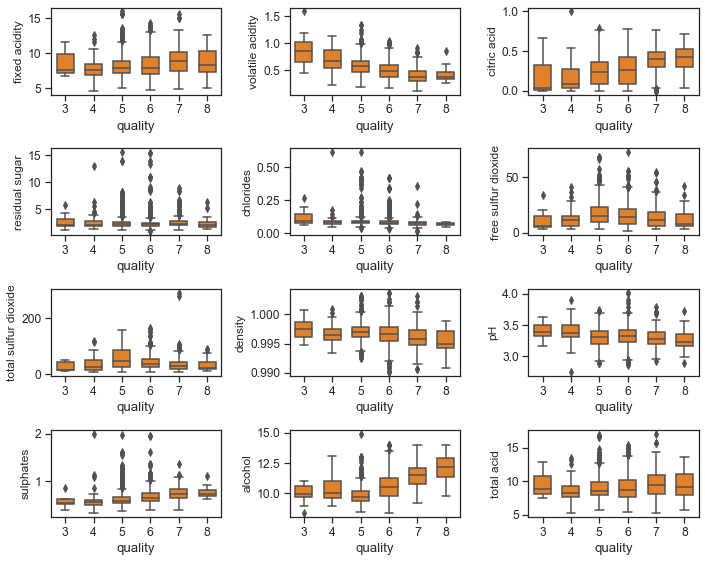

In [21]:
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1.1)

colnm = df.columns.tolist()[:11] + ['total acid']
plt.figure(figsize=(10,8))

for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(x='quality', y=colnm[i], data=df, color=color[1], width=0.6)
    plt.ylabel(colnm[i],fontsize=12)
plt.tight_layout()
print("\nFigure 7: Physicochemical Properties and Wine Quality by Boxplot")


Figure 8: Pairwise Correlation Plot


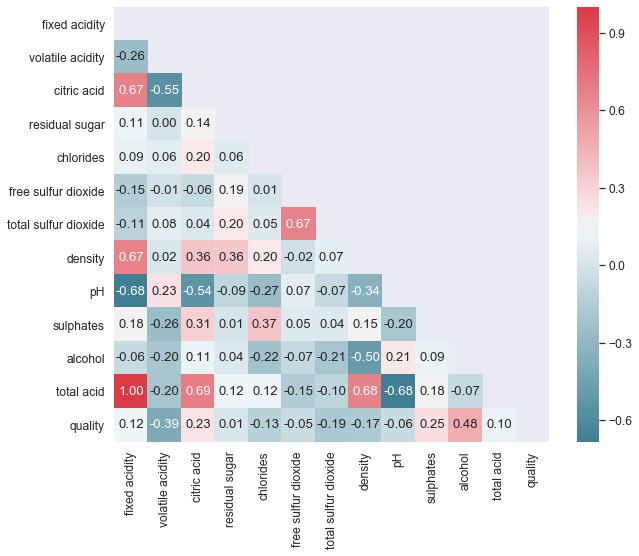

In [23]:
sns.set_style("dark")

plt.figure(figsize=(10,8))
colnm = df.columns.tolist()[:11] + ['total acid', 'quality']
mcorr = df[colnm].corr()
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
print("\nFigure 8: Pairwise Correlation Plot")

### 密度和酒精浓度 

密度和酒精浓度是相关的,物理上.两者并不是线性关系。另外密度还与酒中其他物质的含量有关，但是关系很小

Figure 9: Density vs Alcohol


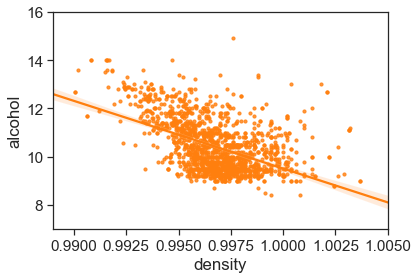

In [27]:
# style
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.4)

# plot figure
plt.figure(figsize=(6,4))
sns.regplot(x='density', y='alcohol', data=df, scatter_kws={'s':10}, color=color[1])
plt.xlim(0.989,1.005)
plt.ylim(7,16)
print('Figure 9: Density vs Alcohol')

##### 酸性物质含量和pH 

PH和非挥发性酸性物质有-0.683的相关性。因为非发挥性酸性物质的含量远远高于其他酸性物质,总酸性物质(total acidity)这个特征并没有太多意义

Figure 10: pH vs acid


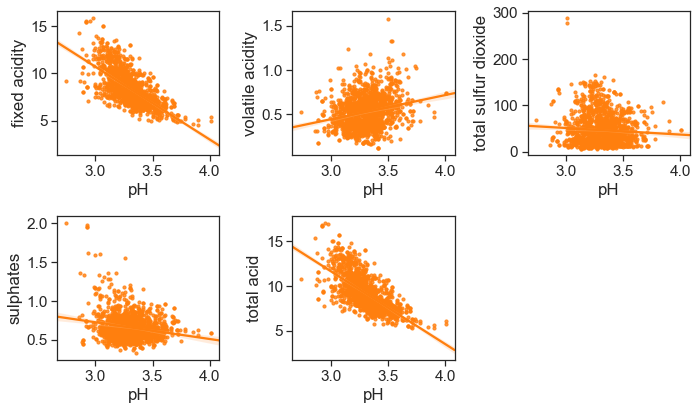

In [29]:
acidity_related = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide',
                   'sulphates', 'total acid']
plt.figure(figsize=(10,6))

for i in range(5):
    plt.subplot(2,3,i+1)
    sns.regplot(x='pH', y=acidity_related[i], data=df, scatter_kws={'s': 10}, color=color[1])
plt.tight_layout()
print("Figure 10: pH vs acid")

### 多变量分析 

与品质相关性最高的三个特征是酒精浓度，挥发性酸度，和柠檬酸。下面图中显示的酒精浓度，挥发性酸和品质的关系。

#### 酒精浓度，挥发性酸和品质

对于好酒（7,8）以及差酒（3,4）,关系很明显。但是对于中等酒（5,6），酒精浓度的挥发性酸度有很大的交叉

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Figure 11-1: Scatter Plots of Alcohol, Volatile Acid and Quality


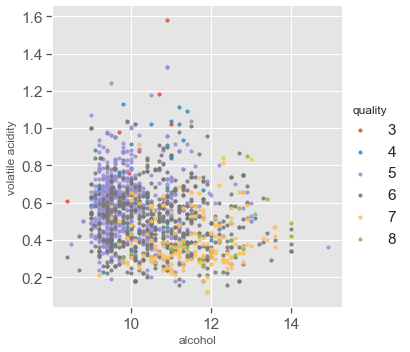

In [30]:
plt.style.use('ggplot')
sns.lmplot(x='alcohol', y='volatile acidity', hue='quality',
           data=df, fit_reg=False, scatter_kws={'s': 10}, size=5)
print("Figure 11-1: Scatter Plots of Alcohol, Volatile Acid and Quality")

Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality


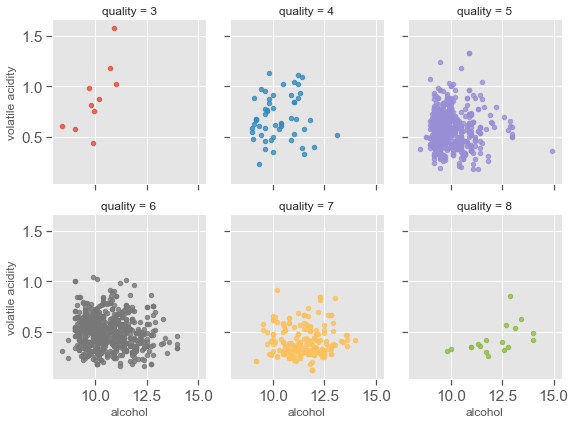

In [31]:
sns.lmplot(x='alcohol',y='volatile acidity',col='quality',hue='quality',
           data=df,fit_reg=False, size=3, aspect=0.9, col_wrap=3,
           scatter_kws={'s':20})
print("Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality")

### pH,非挥发性酸,和柠檬酸

Figure 12: pH with Fixed Acidity and Citric Acid


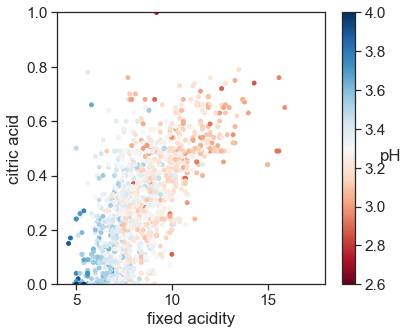

In [33]:
# style
sns.set_style('ticks')
sns.set_context("notebook",font_scale=1.4)

plt.figure(figsize=(6,5))
cm = plt.cm.get_cmap('RdBu')
sc = plt.scatter(df['fixed acidity'], df['citric acid'], c=df['pH'], vmin=2.6, vmax=4, s=15, cmap=cm)
bar = plt.colorbar(sc)
bar.set_label('pH', rotation=0)
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.xlim(4,18)
plt.ylim(0,1)
print('Figure 12: pH with Fixed Acidity and Citric Acid')